In [22]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv("TelecomCustomerChurn.csv")

df.head(10)

,Call Failure,Complaints,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0
5,11,0,38,1,3775,82,32,28,3,1,1,30,282.280,0
6,4,0,38,0,2360,39,285,18,3,1,1,30,1235.960,0
7,13,0,37,2,9115,121,144,43,3,1,1,30,945.440,0
8,7,0,38,0,13773,169,0,44,3,1,1,30,557.680,0
9,7,0,38,1,4515,83,2,25,3,1,1,30,191.920,0


🗺️ Explore: Which age groups send more SMS messages than make phone calls?

📊 Visualize: Create a plot visualizing the number of distinct phone calls by age group. Within the chart, differentiate between short, medium, and long calls (by the number of seconds).

🔎 Analyze: Are there significant differences between the length of phone calls between different tariff plans?

In [27]:
df.groupby("Age Group")[['Frequency of SMS', 'Distinct Called Numbers']].mean()

,Frequency of SMS,Distinct Called Numbers
Age Group,,
1,18.193548,34.112903
2,77.630769,22.015385
3,87.448387,21.372581
4,31.490798,27.527607
5,22.222222,25.888889


🗺️ 2nd and 3rd age groups send drastically more SMS messages than make phone calls, and 4th group sends slighty more SMS messages than make phone calls. 

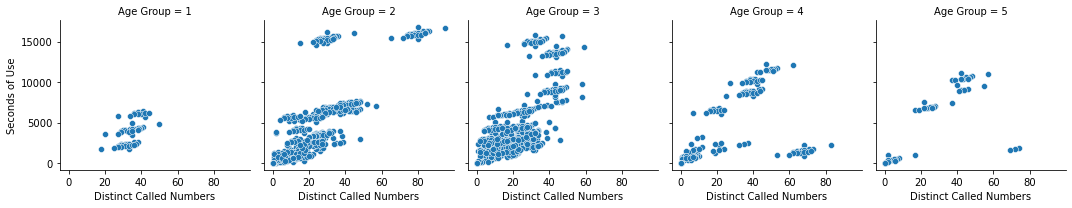

In [28]:
grid = sns.FacetGrid(df, col = "Age Group")
grid.map(sns.scatterplot, "Distinct Called Numbers", "Seconds of Use")

📊 Visualize: We can see the distributions of the Distinct Called Numbers and the lengths of the conversations for each age group.

In [29]:
df['Tariff Plan'].value_counts()

1    1323
2     105
Name: Tariff Plan, dtype: int64

In [30]:
df.groupby("Tariff Plan")['Seconds of Use'].mean()

Tariff Plan
1    4296.509448
2    5828.180952
Name: Seconds of Use, dtype: float64

🔎 Analyze: Most of the clients use Tariff Plan 1, but the lengths of phone calls of clients who use Tariff Plan 2 are 35% longer on average.

# ML

## EDA

In [126]:
df.describe()

,Call Failure,Complaints,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000
mean,6.288515,0.087535,32.161064,0.745798,4409.132353,68.169468,71.601541,23.061625,2.751401,1.073529,1.243697,30.343137,470.257892,0.163165
std,6.601328,0.282716,8.524295,1.403950,4198.846569,57.233236,112.737058,17.048646,0.875881,0.261095,0.429463,8.488909,525.525529,0.369646
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,0.000000,0.000000,29.000000,0.000000,1362.250000,26.000000,1.000000,10.000000,2.000000,1.000000,1.000000,25.000000,109.545000,0.000000
50%,5.000000,0.000000,35.000000,0.000000,2917.500000,52.000000,18.000000,20.000000,3.000000,1.000000,1.000000,30.000000,223.697500,0.000000
75%,9.000000,0.000000,38.000000,1.000000,6420.000000,93.000000,85.250000,33.000000,3.000000,1.000000,1.000000,30.000000,787.950000,0.000000
max,31.000000,1.000000,45.000000,10.000000,16785.000000,249.000000,515.000000,95.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call Failure             1428 non-null   int64  
 1   Complaints               1428 non-null   int64  
 2   Subscription Length      1428 non-null   int64  
 3   Charge Amount            1428 non-null   int64  
 4   Seconds of Use           1428 non-null   int64  
 5   Frequency of use         1428 non-null   int64  
 6   Frequency of SMS         1428 non-null   int64  
 7   Distinct Called Numbers  1428 non-null   int64  
 8   Age Group                1428 non-null   int64  
 9   Tariff Plan              1428 non-null   int64  
 10  Status                   1428 non-null   int64  
 11  Age                      1428 non-null   int64  
 12  Customer Value           1428 non-null   float64
 13  Churn                    1428 non-null   int64  
dtypes: float64(1), int64(13)

Age Group, Tariff Plan, Status, Churn, Charge Amount and Complaints are categorical features. Other features are numerical. Also, there is not any null value.

Before creating ML model, we should see the relationships between the features and the target.

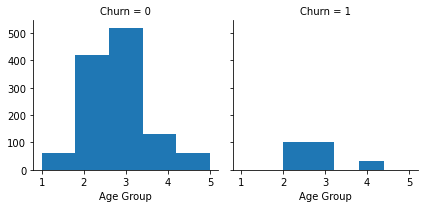

In [128]:
g = sns.FacetGrid(df, col = "Churn")
g.map(plt.hist, "Age Group", bins = 5)

Most clients didn't churn and clients who are in the first and fifth age group didn't churn. We may want to add Age Group as a feature into our model. Because of the Age Group, I don't think Age will make any contribution to the model.

In [129]:
categorical = ["Age Group", "Tariff Plan", "Status", "Charge Amount", "Complaints"]

In [130]:
for i in categorical:
    print(df.groupby(i)["Churn"].mean())

Age Group
1    0.000000
2    0.192308
3    0.161290
4    0.196319
5    0.015873
Name: Churn, dtype: float64
Tariff Plan
1    0.172336
2    0.047619
Name: Churn, dtype: float64
Status
1    0.061111
2    0.479885
Name: Churn, dtype: float64
Charge Amount
0     0.218404
1     0.098540
2     0.059259
3     0.016949
4     0.000000
5     0.000000
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000000
Name: Churn, dtype: float64
Complaints
0    0.102072
1    0.800000
Name: Churn, dtype: float64


It is clearly seen that Status and Complaints are two strongly correlated features with the target. Interestingly Charge Amount has an impact on the target. Tariff Plan doesn't look so important to me.

In [131]:
numerical = ["Call Failure", "Subscription Length", "Seconds of Use", "Frequency of use", "Frequency of SMS", "Distinct Called Numbers", "Customer Value"]

In [132]:
df.groupby("Churn")["Call Failure"].mean()

Churn
0    6.287866
1    6.291845
Name: Call Failure, dtype: float64

In [133]:
for i in numerical:
    print(df.groupby("Churn")[i].mean())
    

Churn
0    6.287866
1    6.291845
Name: Call Failure, dtype: float64
Churn
0    32.281172
1    31.545064
Name: Subscription Length, dtype: float64
Churn
0    4966.136402
1    1552.394850
Name: Seconds of Use, dtype: float64
Churn
0    75.815063
1    28.957082
Name: Frequency of use, dtype: float64
Churn
0    82.389958
1    16.270386
Name: Frequency of SMS, dtype: float64
Churn
0    25.196653
1    12.111588
Name: Distinct Called Numbers, dtype: float64
Churn
0    536.368908
1    131.190665
Name: Customer Value, dtype: float64


I'll take Seconds of Use, Frequency of Use, Frequency of SMS, Distinct Called Numbers and Customer Value into model.

In [134]:
X = df[["Seconds of Use", "Frequency of use", "Frequency of SMS", "Distinct Called Numbers", "Customer Value", "Status", "Complaints", "Charge Amount"]]

y = df[["Churn"]]

In [138]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

predictions = rf.predict(X_test)

accuracy_score(y_test, predictions)


0.9417249417249417

In [139]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rf, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0783 ± 0.0070,Complaints
0.0517 ± 0.0116,Seconds of Use
0.0317 ± 0.0152,Status
0.0224 ± 0.0201,Frequency of use
0.0219 ± 0.0183,Distinct Called Numbers
0.0084 ± 0.0048,Frequency of SMS
0.0070 ± 0.0051,Charge Amount
0.0061 ± 0.0091,Customer Value


Permutation importance shows that all features have positive effect on predictions. 